In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer, fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
data = load_breast_cancer()

In [8]:
X = data.data
y = 1 - data.target # to make malignant 1 and benign 0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # don't need to scale yet because doing it in Pipeline

In [10]:
ss = StandardScaler()

In [31]:
def model_funk(layer_one_neurons = 30, layer_two_neurons = 15):  # can make neurons dynamic
    model = Sequential()
    
    model.add(Dense(layer_one_neurons, input_dim=30, activation = 'relu')) # 30 neurons
    model.add(Dense(layer_two_neurons, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))  # 1 hidden layer
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

the_model = KerasClassifier(build_fn=model_funk, epochs = 10, verbose = 0)   #function that creates a model and returns it

In [32]:
pipe = Pipeline([
    ('ss', ss),
    ('model', the_model)
])

In [33]:
params = {
    'model__epochs' : [10],
    'model__layer_one_neurons' : [15, 35],
    'model__layer_two_neurons' : [15, 20]
}
gs = GridSearchCV(pipe, param_grid = params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9647887307153621


{'model__epochs': 10,
 'model__layer_one_neurons': 35,
 'model__layer_two_neurons': 15}

In [34]:
gs.score(X_test, y_test)

0.9860139864308017

In [3]:
# images

data = fetch_lfw_people(min_faces_per_person=35)  # give me only people with 70 faces in the data set

ImportError: The Python Imaging Library (PIL) is required to load data from jpeg files

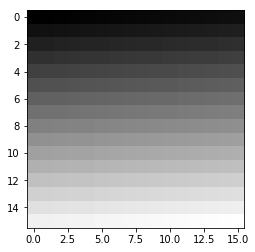

In [37]:
grays = np.arange(256).reshape(16, 16)  # list of numbers from 0 to 255 to represent 256 color scale; 16, 16 to get it into a square to look at matplotlib 16x16=256
plt.imshow(grays, cmap =plt.cm.gray)

In [40]:
data.images[0].shape

AttributeError: images